In [ ]:
import kagglehub
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/CS114/StudentPerformanceFactors.csv")
df.head(5)

# Xem trước dữ liệu
print("Dữ liệu mẫu:")
print(df.head())
print("\nThông tin dữ liệu:")
print(df.info())

# Kiểm tra các cột trong dataset
print("Các cột trong dataset:", df.columns)

# Giả sử 'Exam_Score' là cột mục tiêu (target), các cột còn lại là đặc trưng (features)
target_column = 'Exam_Score'  # Thay đổi nếu tên cột khác
feature_columns = [col for col in df.columns if col != target_column]

# Xử lý giá trị thiếu (nếu có)
df = df.fillna(df.mean(numeric_only=True))  # Điền giá trị thiếu bằng trung bình cho cột số
df = df.fillna(df.mode().iloc[0])  # Điền giá trị thiếu bằng mode cho cột phân loại

# Mã hóa các cột phân loại (categorical)
df_encoded = pd.get_dummies(df, columns=[col for col in feature_columns if df[col].dtype == 'object'], drop_first=True)

# Chia dữ liệu thành features (X) và target (y)
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chuẩn hóa dữ liệu (cần thiết cho SVR, KNN, Linear Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Kích thước tập huấn luyện:", X_train_scaled.shape)
print("Kích thước tập kiểm tra:", X_test_scaled.shape)

Mounted at /content/drive
Dữ liệu mẫu:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0                         No            7               73              Low   
1                         No            8               59              Low   
2                        Yes            7               91           Medium   
3                        Yes            8               98           Medium   
4                        Yes            6               65           Medium   

  Internet_Access  Tutoring_Sessions Family_Inc

In [ ]:
# Dictionary để lưu kết quả của các mô hình
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "SVR": SVR(kernel='rbf'),  # Sử dụng kernel RBF, phổ biến cho hồi quy
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": xgb.XGBRegressor(n_estimators=100, random_state=42),
    "LightGBM": lgb.LGBMRegressor(n_estimators=100, random_state=42)
}

# Dictionary để lưu kết quả đánh giá
results = {}

# Huấn luyện và đánh giá từng mô hình
for name, model in models.items():
    # Huấn luyện mô hình
    if name in ["Linear Regression", "SVR", "KNN"]:
        model.fit(X_train_scaled, y_train)  # Các mô hình này cần dữ liệu chuẩn hóa
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)  # Các mô hình cây (Random Forest, XGBoonst, LightGBM) không cần chuẩn hóa
        y_pred = model.predict(X_test)

    # Đánh giá mô hình
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R2": r2}

    print(f"\nKết quả của {name}:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R^2 Score: {r2:.2f}")

# So sánh các mô hình
print("\nSo sánh các mô hình:")
for name, metrics in results.items():
    print(f"{name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.2f}")


Kết quả của Linear Regression:
Mean Squared Error: 3.26
R^2 Score: 0.77

Kết quả của Random Forest:
Mean Squared Error: 4.99
R^2 Score: 0.65

Kết quả của Gradient Boosting:
Mean Squared Error: 3.81
R^2 Score: 0.73

Kết quả của SVR:
Mean Squared Error: 3.38
R^2 Score: 0.76

Kết quả của KNN:
Mean Squared Error: 8.09
R^2 Score: 0.43

Kết quả của XGBoost:
Mean Squared Error: 4.61
R^2 Score: 0.67
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 201
[LightGBM] [Info] Number of data points in the train set: 5285, number of used features: 27
[LightGBM] [Info] Start training from score 67.215137

Kết quả của LightGBM:
Mean Squared Error: 3.89
R^2 Score: 0.72

So sánh các mô hình:
Linear Regression: MSE = 3.26, R2

Kết quả của SVR từ đầu:
Mean Squared Error: 3.24
R^2 Score: 0.77


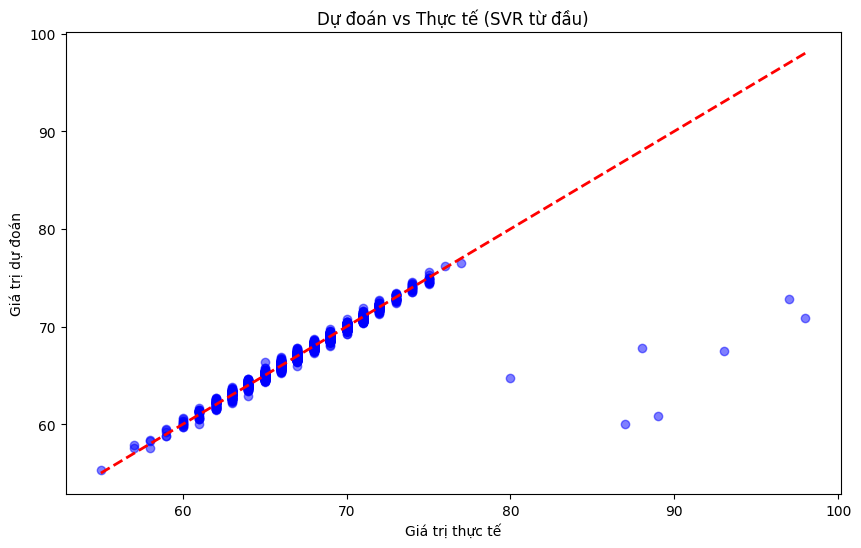

In [ ]:

import kagglehub
import pandas as pd
import os
import numpy as np
from cvxopt import matrix, solvers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Triển khai SVR tuyến tính từ đầu
class SVRFromScratch:
    def __init__(self, C=1.0, epsilon=0.1, tol=1e-4):
        self.C = C
        self.epsilon = epsilon
        self.tol = tol
        self.w = None
        s = None
        self.b = None
        self.alphas = None
        self.support_vectors = None

    def fit(self, X, y):
        # Convert X and y to NumPy arrays if they are DataFrames/Series
        if isinstance(X, pd.DataFrame):
            X = X.values  # Convert DataFrame to NumPy array
        if isinstance(y, pd.Series):
            y = y.values  # Convert Series to NumPy array

        n_samples, n_features = X.shape

        # Tính ma trận kernel K = X * X^T (SVR tuyến tính)
        K = np.dot(X, X.T)

        # Xây dựng ma trận P đúng kích thước (2n, 2n)
        P = np.zeros((2 * n_samples, 2 * n_samples))
        for i in range(2 * n_samples):
            for j in range(2 * n_samples):
                if i < n_samples and j < n_samples:
                    P[i, j] = K[i, j]
                elif i < n_samples and j >= n_samples:
                    P[i, j] = -K[i, j - n_samples]
                elif i >= n_samples and j < n_samples:
                    P[i, j] = -K[i - n_samples, j]
                else:
                    P[i, j] = K[i - n_samples, j - n_samples]

        # Chuyển P thành ma trận cvxopt
        P = matrix(P, tc='d')

        # Vector q = -epsilon * 1 - y
        q = -self.epsilon * np.ones(2 * n_samples) - np.hstack([y, -y])
        q = matrix(q, tc='d')

        # Ràng buộc Gx <= h
        G = np.vstack([
            -np.eye(2 * n_samples),  # alpha_i, alpha_i^* >= 0
            np.eye(2 * n_samples)    # alpha_i, alpha_i^* <= C
        ])
        G = matrix(G, tc='d')

        h = np.hstack([
            np.zeros(2 * n_samples),  # alpha_i, alpha_i^* >= 0
            self.C * np.ones(2 * n_samples)  # alpha_i, alpha_i^* <= C
        ])
        h = matrix(h, tc='d')

        # Ràng buộc A^T * x = b (tổng alpha_i - alpha_i^* = 0)
        A = matrix(np.hstack([np.ones(n_samples), -np.ones(n_samples)]), (1, 2 * n_samples), tc='d')
        b = matrix(0.0, tc='d')

        # Giải bài toán QP
        solvers.options['show_progress'] = False
        solution = solvers.qp(P, q, G, h, A, b)
        alphas = np.array(solution['x']).flatten()

        # Tách alpha_i và alpha_i^*
        self.alphas = alphas[:n_samples] - alphas[n_samples:]

        # Tìm support vectors (các alpha_i trong khoảng (tol, C - tol))
        sv_idx = np.where((np.abs(self.alphas) > self.tol) & (np.abs(self.alphas) < self.C - self.tol))[0]
        self.support_vectors = X[sv_idx]
        self.support_alphas = self.alphas[sv_idx]
        self.support_y = y[sv_idx]

        # Tính w
        self.w = np.sum((self.alphas[:, np.newaxis] * X), axis=0)

        # Tính b từ một support vector
        if len(sv_idx) > 0:
            sv = sv_idx[0]
            self.b = y[sv] - np.dot(self.w, X[sv]) - self.epsilon * np.sign(self.alphas[sv])
        else:
            self.b = 0

    def predict(self, X):
        return np.dot(X, self.w) + self.b

# Khởi tạo và huấn luyện mô hình SVR
svr = SVRFromScratch(C=1.0, epsilon=0.1)
svr.fit(X_train, y_train)

# Dự đoán
y_pred = svr.predict(X_test)

# Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Kết quả của SVR từ đầu:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")